In [ ]:
'''
【课程2.3】  数据归一化/标准化

 数据的标准化（normalization）是将数据按比例缩放，使之落入一个小的特定区间。
 在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权
 
最典型的就是数据的归一化处理，即将数据统一映射到[0,1]区间上

0-1标准化 / Z-score标准化

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# 数据标准化
# （1）0-1标准化
# 将数据的最大最小值记录下来，并通过Max-Min作为基数（即Min=0，Max=1）进行数据的归一化处理
# x = (x - Min) / (Max - Min)

df = pd.DataFrame({"value1":np.random.rand(10)*20,
                  'value2':np.random.rand(10)*100})
print(df.head())
print('------')
# 创建数据

def data_norm(df,*cols):
    df_n = df.copy()
    for col in cols:
        ma = df_n[col].max()
        mi = df_n[col].min()
        df_n[col + '_n'] = (df_n[col] - mi) / (ma - mi)
    return(df_n)
# 创建函数，标准化数据

df_n = data_norm(df,'value1','value2')
print(df_n.head())
# 标准化数据

      value1     value2
0   1.058973  80.176250
1   2.268353  72.748326
2   8.845245  38.677480
3   6.787782  61.089715
4  19.699524  91.723522
------
      value1     value2  value1_n  value2_n
0   1.058973  80.176250  0.000000  0.741446
1   2.268353  72.748326  0.064879  0.618601
2   8.845245  38.677480  0.417706  0.055126
3   6.787782  61.089715  0.307330  0.425787
4  19.699524  91.723522  1.000000  0.932418


In [3]:
# 数据标准化
# （2）Z-score标准化
# Z分数（z-score）,是一个分数与平均数的差再除以标准差的过程 → z=(x-μ)/σ，其中x为某一具体分数，μ为平均数，σ为标准差
# Z值的量代表着原始分数和母体平均值之间的距离，是以标准差为单位计算。在原始分数低于平均值时Z则为负数，反之则为正数
# 数学意义：一个给定分数距离平均数多少个标准差?

df = pd.DataFrame({"value1":np.random.rand(10) * 100,
                  'value2':np.random.rand(10) * 100})
print(df.head())
print('------')
# 创建数据

def data_Znorm(df, *cols):
    df_n = df.copy()
    for col in cols:
        u = df_n[col].mean()
        std = df_n[col].std()
        df_n[col + '_Zn'] = (df_n[col] - u) / std
    return(df_n)
# 创建函数，标准化数据

df_z = data_Znorm(df,'value1','value2')
u_z = df_z['value1_Zn'].mean()
std_z = df_z['value1_Zn'].std()
print(df_z)
print('标准化后value1的均值为:%.2f, 标准差为：%.2f' % (u_z, std_z))
# 标准化数据
# 经过处理的数据符合标准正态分布，即均值为0，标准差为1

# 什么情况用Z-score标准化：
# 在分类、聚类算法中，需要使用距离来度量相似性的时候，Z-score表现更好

      value1     value2
0  87.320919  48.352809
1  26.031312   7.175187
2  30.446934  51.214317
3  95.423791  86.417366
4  83.931369  82.795884
------
      value1     value2  value1_Zn  value2_Zn
0  87.320919  48.352809   0.910447  -0.206182
1  26.031312   7.175187  -0.853275  -1.425002
2  30.446934  51.214317  -0.726208  -0.121484
3  95.423791  86.417366   1.143622   0.920495
4  83.931369  82.795884   0.812906   0.813302
5  42.323130  77.843953  -0.384448   0.666730
6  92.152700   2.869294   1.049490  -1.552452
7  15.126391  78.057041  -1.167085   0.673037
8   7.050190  24.868290  -1.399492  -0.901302
9  77.020849  93.592031   0.614043   1.132858
标准化后value1的均值为:0.00, 标准差为：1.00


,value1,value2,value1_n,value2_n,f
A,23.927355,99.066097,0.808557,1.000000,0.885134
C,20.015661,52.019939,0.674994,0.487658,0.600060
F,29.534207,7.240362,1.000000,0.000000,0.600000
J,21.891125,40.366034,0.739031,0.360745,0.587716
D,12.447608,76.654287,0.416586,0.755931,0.552324
G,12.570029,53.480681,0.420766,0.503566,0.453886
E,2.060190,94.382541,0.061913,0.948995,0.416746
I,0.644139,84.523030,0.013563,0.841623,0.344787
B,0.246922,31.857919,0.000000,0.268090,0.107236
H,3.962916,8.602333,0.126881,0.014832,0.082061


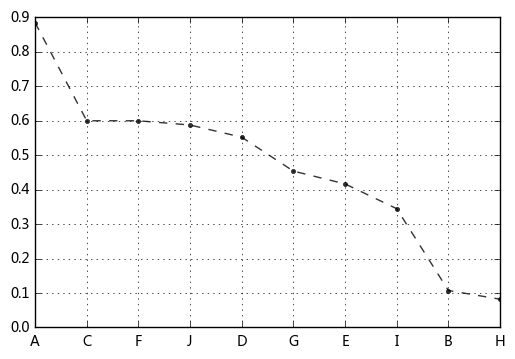

In [4]:
# 案例应用
# 八类产品的两个指标value1，value2，其中value1权重为0.6，value2权重为0.4
# 通过0-1标准化，判断哪个产品综合指标状况最好

df = pd.DataFrame({"value1":np.random.rand(10) * 30,
                  'value2':np.random.rand(10) * 100},
                 index = list('ABCDEFGHIJ'))
#print(df.head())
#print('------')
# 创建数据"

df_n1 = data_norm(df,'value1','value2')
# 进行标准化处理

df_n1['f'] = df_n1['value1_n'] * 0.6 + df_n1['value2_n'] * 0.4
df_n1.sort_values(by = 'f',inplace=True,ascending=False)
df_n1['f'].plot(kind = 'line', style = '--.k', alpha = 0.8, grid = True)
df_n1
# 查看综合指标状况